## <center> Probability and Statistics



In [1]:
import random
import torch
from torch.distributions.multinomial import Multinomial
import matplotlib.pyplot as plt 

### Discrete distribution - Multinomial distribution

A Simple Example: Tossing Coins


In [2]:
num_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(100)])
tails = num_tosses - heads
print("heads, tails: ", [heads, tails])

heads, tails:  [44, 56]


In [3]:
fair_probs = torch.tensor([0.5, 0.5])
Multinomial(100, fair_probs).sample()

tensor([49., 51.])

Each time you run this sampling process,
you will receive a new random value
that may differ from the previous outcome.
Dividing by the number of tosses
gives us the *frequency*
of each outcome in our data.
Note that these frequencies,
like the probabilities
that they are intended
to estimate, sum to $1$.


In [4]:
Multinomial(100, fair_probs).sample() / 100

tensor([0.5200, 0.4800])

Here, even though our simulated coin is fair
(we set the probabilities `[0.5, 0.5]` ourselves),
the counts of heads and tails may not be identical.
That is because we only drew a finite number of samples.
If we did not implement the simulation ourselves,
and only saw the outcome,
how would we know if the coin were slightly unfair
or if the possible deviation from $1/2$ was
just an artifact of the small sample size?
Let's see what happens when we simulate `10000` tosses.


In [5]:
counts = Multinomial(10000, fair_probs).sample()
counts / 10000

tensor([0.5064, 0.4936])

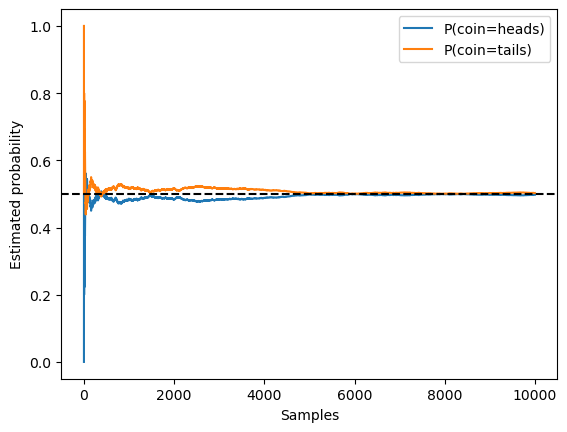

In [6]:
counts = Multinomial(1, fair_probs).sample((10000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates = estimates.numpy()

plt.plot(estimates[:, 0], label=("P(coin=heads)"))
plt.plot(estimates[:, 1], label=("P(coin=tails)"))
plt.axhline(y=0.5, color='black', linestyle='dashed')
plt.gca().set_xlabel('Samples')
plt.gca().set_ylabel('Estimated probability')
plt.legend();

### Continuous distribution - Gaussian distribution

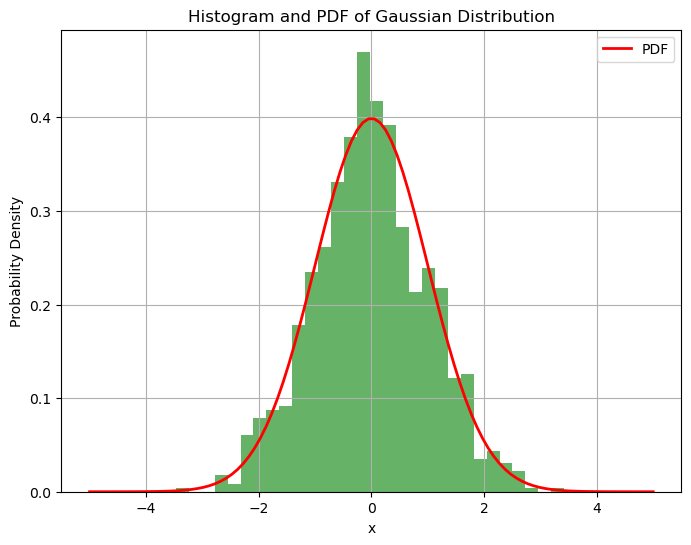

In [7]:
# Define parameters for the Gaussian distribution
mu = 0.0  # Mean
sigma = 1.0  # Standard deviation

# Create a Gaussian (normal) distribution object
normal_dist = torch.distributions.Normal(mu, sigma)

# Generate samples from the Gaussian distribution
samples = normal_dist.sample((1000,))  # Generate 1000 samples

# Plot the histogram of generated samples
plt.figure(figsize=(8, 6))
plt.hist(samples.numpy(), bins=30, density=True, alpha=0.6, color='g')

# Plot the probability density function (PDF) of the Gaussian distribution
x = torch.linspace(-5, 5, 100)
plt.plot(x.numpy(), normal_dist.log_prob(x).exp().numpy(), 'r-', lw=2, label='PDF')

plt.title('Histogram and PDF of Gaussian Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()
